png 
  2

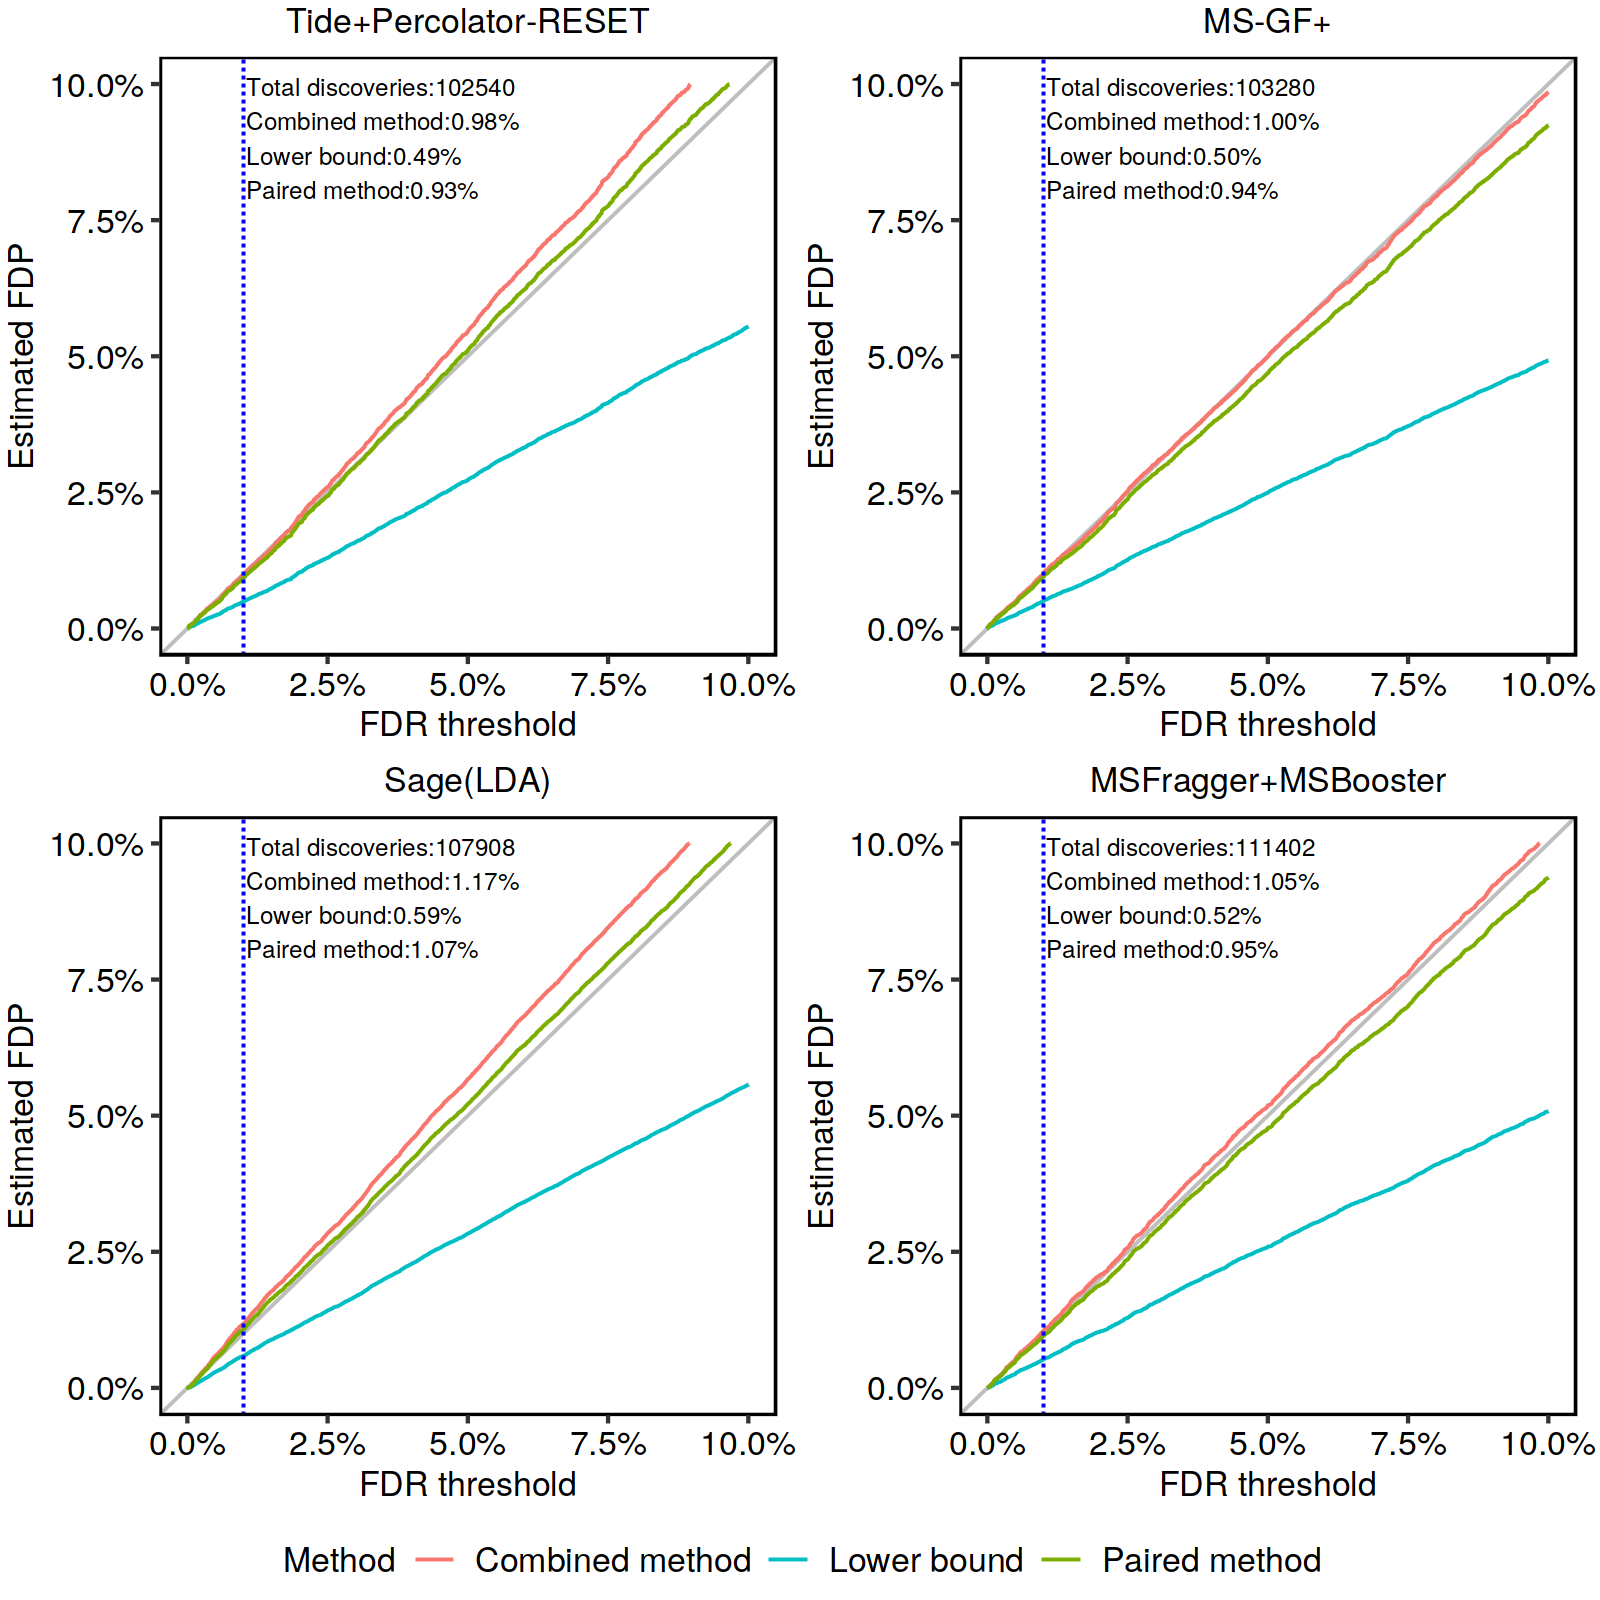

In [3]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
# color_mapping <- c("Paired entrapment" = "blue", "Sample entrapment" = "red", "Lower bound" = "green", "Combined entrapment" = "purple")
color_mapping <- c("Paired method" = "#7CAE00", "Sample method" = "#C77CFF", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")


### Tide peptide level
report_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/tide/pair_single.peptides.txt"
pep_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/database/UP000005640_9606_entrapment_pep.txt"
pro_fdp_file1 <- run_percolator_reset_fdp_analysis(report_file,level = "peptide",prefix = "tide-peptide",pep_file = pep_file,k_fold=1)
#pro_fdp_file1 <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/tide_paired_entrapment/UP000005640_9606_1entrapment_pep_result/tide-peptide-percolator_fdp_peptide.csv"
gg1 <- plot_fdp_fdr_v2(pro_fdp_file1,fdr_max = 0.1,fig_title="Tide+Percolator-RESET",add_numbers = TRUE, color_mapping=color_mapping,legend_position=c(0.5,0.5),fdr_decimal_place = 2)


### MS-GF+ 
cwd <- getwd()
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
setwd("/net/noble/vol1/home/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/msgf_paired_entrapment_peptide_level/")
report_file <- "UP000005640_9606_1entrapment_pep_decoy.tsv"
pep_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/database/UP000005640_9606_1entrapment_pep_decoy.txt"
# pro_fdp_file1 <- run_msgf_fdp_analysis(report_file,level = "peptide",prefix = "msgf-peptide-r1",pep_file = pep_file,k_fold=1)
pro_fdp_file1 <- "/net/noble/vol1/home/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/msgf_paired_entrapment_peptide_level/msgf-peptide-r1-msgf_fdp_peptide.csv"
gg2 <- plot_fdp_fdr_v2(pro_fdp_file1,fdr_max = 0.1,fig_title="MS-GF+",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = 2)
setwd(cwd)


### Sage
## /data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/sage_paired_entrapment/
report_file <- "./UP000005640_9606_I2L_entrapment/results.sage.tsv"
pep_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/database/UP000005640_9606_entrapment_pep.txt"
# pro_fdp_file1 <- run_sage_fdp_analysis(report_file,level = "peptide",prefix = "sage-peptide",pep_file = pep_file,k_fold=1)
pro_fdp_file1 <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/sage_paired_entrapment/UP000005640_9606_I2L_entrapment/sage-peptide-sage_fdp_peptide.csv"
gg3 <- plot_fdp_fdr_v2(pro_fdp_file1,fdr_max = 0.1,fig_title="Sage(LDA)",add_numbers = TRUE,r=1, color_mapping=color_mapping,fdr_decimal_place = 2)


### MSFragger peptide level
report_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/fragpipe_paired_entrapment/UP000005640_9606_1entrapment_pep_decoy/fragpipe_1entrapment_peptide_level/percolator.target.peptides.txt"
pep_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/database/UP000005640_9606_1entrapment_pep_decoy.txt"
#pro_fdp_file1 <- run_percolator_fdp_analysis(report_file,level = "peptide",prefix = "tide-peptide",pep_file = pep_file,k_fold=1)
pro_fdp_file1 <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/fragpipe_paired_entrapment/UP000005640_9606_1entrapment_pep_decoy/fragpipe_1entrapment_peptide_level/msfragger-peptide-percolator_fdp_peptide.csv"
gg5 <- plot_fdp_fdr_v2(pro_fdp_file1,fdr_max = 0.1,fig_title="MSFragger+MSBooster",add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = 2)


options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4*2, repr.plot.height = 4*2, repr.plot.res = 200)
library(cowplot)
legend <- as_ggplot(get_legend(gg1))+theme(legend.position = c(0.5, 0.5))
gg <- ggarrange(gg1+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                gg2+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                gg3+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                gg5+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                legend = "bottom", common.legend=TRUE, ncol = 2, nrow = 2, align = "hv")
                #labels = c("a", "b", "c", "d","e"))
print(gg)

pdf("Figure3.pdf",width = 3.5*2,height = 3.5*2) 
print(gg)
dev.off()